In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('tested.csv')

In [3]:
# Feature engineering
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [4]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [5]:
# Drop unnecessary columns
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [6]:
# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Embarked', 'Title']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [7]:
# Split features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Define and train model
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [11]:
# Best model
best_model = grid_search.best_estimator_

In [12]:
# Evaluation
y_pred = best_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


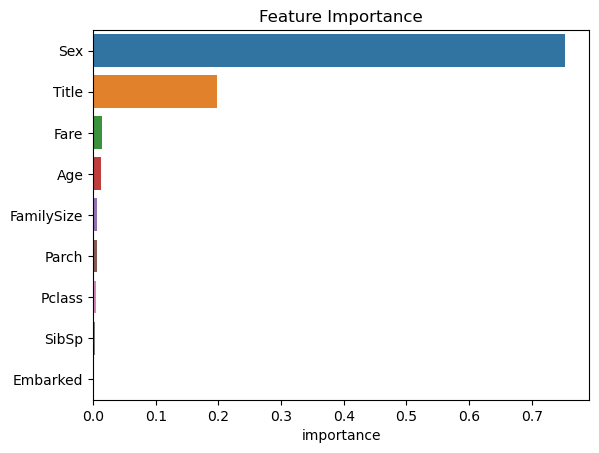

In [13]:
# Feature importance
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importance')
plt.show()

ADDING ADVANCED FEATURES

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [25]:
# Additional feature engineering
if 'Cabin' in df.columns:
    df['CabinLetter'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Unknown')
else:
    df['CabinLetter'] = 'Unknown'
df['FarePerPerson'] = df['Fare'] / (df['FamilySize'] + 1)

In [26]:
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize', 'CabinLetter', 'FarePerPerson'],
      dtype='object')


In [27]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

In [28]:
columns_to_drop = ['Cabin', 'Name', 'Ticket', 'PassengerId']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df.drop(columns=existing_columns_to_drop, inplace=True)

In [29]:
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

In [30]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


In [31]:
# Feature importance plot for RandomForest (optional)
rf_model = estimators[0][1]
rf_model.fit(X_train, y_train)
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

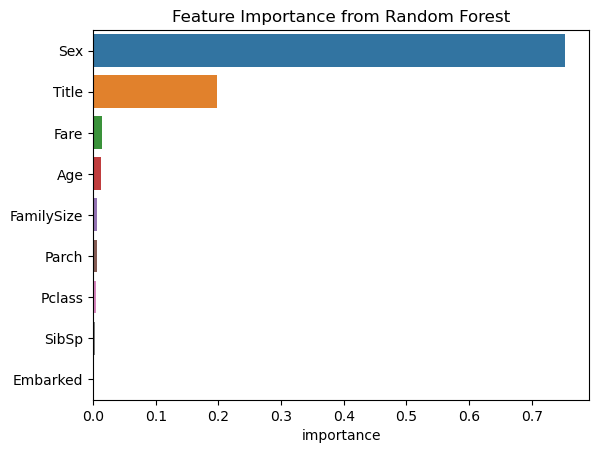

In [32]:
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importance from Random Forest')
plt.show()